In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('User_Data.csv') # Loading data
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
dataset['Purchased'].unique()
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
dataset = dataset.drop('User ID',1)

/tmp/ipykernel_6628/389577925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset = dataset.drop('User ID',1)


In [6]:
dataset.replace('Male',1,inplace=True)
dataset.replace('Female',0,inplace=True)

In [7]:
x = dataset.iloc[:,:3].values

In [8]:
y = dataset.iloc[:,3].values

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 12)

In [10]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [11]:
# print (xtrain[0:10, :])

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()

In [13]:
classifier.fit(xtrain, ytrain)

LogisticRegression()

In [14]:
accuracy_training = accuracy_score(ytrain,classifier.predict(xtrain))
accuracy_training

0.875

In [15]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
cv = StratifiedKFold(n_splits=20)
score = cross_val_score(classifier,xtrain,ytrain,cv=cv,scoring='accuracy')
score.mean()

0.8678571428571429

In [16]:
from sklearn.model_selection import GridSearchCV
param = dict()
param['penalty'] = ['l1','l2']
# param = {'penalty':'l1'}

model_grid = GridSearchCV(classifier,param_grid=param, scoring='accuracy',cv=20)
model_grid.fit(xtrain,ytrain)

/home/lumiq/CDAC/Machine Learning and DNN/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lumiq/CDAC/Machine Learning and DNN/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lumiq/CDAC/Machine Learning and DNN/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/lumiq/CDAC/Machine Learning and D

GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']}, scoring='accuracy')

In [17]:
model_grid.best_params_

{'penalty': 'l2'}

In [18]:
y_pred = classifier.predict(xtest)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [19]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.825


In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, y_pred))

[[61 12]
 [ 9 38]]


In [21]:
from sklearn.metrics import precision_score
print(precision_score(ytest, y_pred))

0.76


In [22]:
from sklearn.metrics import recall_score
print(recall_score(ytest, y_pred))

0.8085106382978723


In [23]:
from sklearn.metrics import f1_score
print(f1_score(ytest, y_pred))

0.7835051546391754


In [24]:
from sklearn.metrics import roc_curve,roc_auc_score

In [26]:
ns_probs = [0 for _ in range(len(ytest))]
ns_probs

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [28]:
lr_probs = classifier.predict_proba(xtest)
# lr_probs
lr_probs = lr_probs[:, 1]
lr_probs

array([9.92109820e-01, 3.43042350e-01, 9.84105828e-01, 3.11625241e-02,
       3.93870065e-02, 9.09754513e-01, 5.01259341e-03, 4.84179231e-02,
       9.91720473e-01, 1.60377287e-01, 9.64331833e-03, 3.98648613e-01,
       6.04952943e-01, 9.81171708e-01, 3.35248564e-01, 7.78769824e-01,
       6.02607757e-01, 7.53767019e-01, 5.85245840e-02, 2.75264290e-02,
       5.79111350e-01, 5.48175413e-01, 3.29749495e-01, 2.04679180e-01,
       7.88495276e-01, 5.99995631e-01, 2.12364228e-01, 6.53418436e-03,
       9.75682322e-01, 5.24546434e-02, 2.40235705e-02, 3.06839761e-02,
       2.37440815e-02, 3.83343402e-01, 9.10968493e-01, 9.74228605e-01,
       5.28079609e-04, 6.77286558e-01, 9.28665594e-01, 8.04925053e-03,
       6.91115958e-03, 9.55194982e-02, 9.50254834e-01, 3.62717925e-03,
       7.49196257e-02, 5.52086083e-04, 5.73304022e-01, 1.60377287e-01,
       6.68378043e-03, 6.21401587e-01, 6.76830029e-01, 5.45746263e-01,
       9.94893598e-01, 3.55628470e-01, 9.74128465e-01, 9.64346066e-01,
      

In [30]:
ns_auc = roc_auc_score(ytest, ns_probs)
ns_auc

0.5

In [32]:
lr_auc = roc_auc_score(ytest, lr_probs)
lr_auc

0.8904109589041096

In [33]:
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

Text(0, 0.5, 'True Positive Rate')

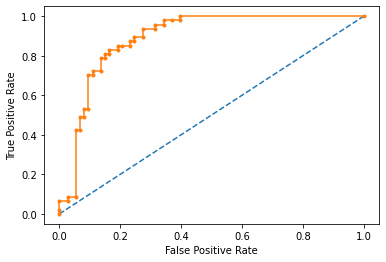

In [43]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')